# 신용거래 이상탐지 데이터 다루기

## 데이터 불러오기, 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
cc_df = pd.read_csv('../data/fraud.csv')
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [5]:
cc_df['is_fraud'].value_counts(normalize=True)

0    0.997467
1    0.002533
Name: is_fraud, dtype: float64

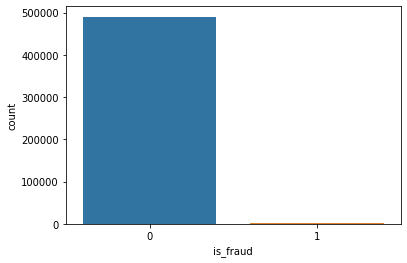

In [6]:
sns.countplot(x='is_fraud', data=cc_df)
plt.show()

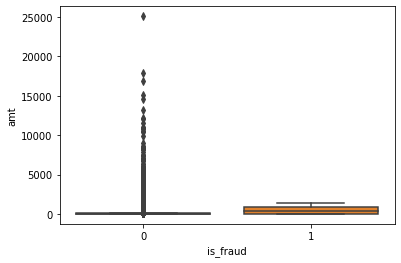

In [7]:
sns.boxplot(x='is_fraud', y='amt', data=cc_df)
plt.show()

In [8]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


## 불필요한 컬럼 제거하기

In [9]:
cc_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0


merchant, job, cc_num 컬럼에 포함된 값의 종류수 확인

In [10]:
cc_df['merchant'].nunique()

693

In [11]:
cc_df['job'].nunique()

110

In [12]:
cc_df['cc_num'].nunique()

124

불필요한 컬럼들을 제거

In [13]:
cc_df.drop(['merchant','first','last','street','city','state','zip','job','trans_num','unix_time'], axis=1, inplace=True)

In [14]:
cc_df.sort_values('cc_num') 

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
378075,2020-08-05 17:03:19,503874407318,shopping_pos,7.77,M,29.5894,-98.5201,1595797,1975-12-28,30.014539,-98.426767,0
230588,2019-12-20 22:21:36,503874407318,health_fitness,72.06,M,29.5894,-98.5201,1595797,1975-12-28,29.260487,-97.961746,0
421413,2020-10-10 12:39:32,503874407318,misc_pos,4.78,M,29.5894,-98.5201,1595797,1975-12-28,29.116928,-99.258936,0
468378,2020-12-13 15:55:44,503874407318,kids_pets,84.56,M,29.5894,-98.5201,1595797,1975-12-28,29.994537,-98.441297,0
345085,2020-06-22 23:52:06,503874407318,entertainment,24.33,M,29.5894,-98.5201,1595797,1975-12-28,29.277168,-98.239289,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53631,2019-04-14 16:57:31,4956828990005111019,entertainment,27.41,M,40.6747,-74.2239,124967,1980-12-21,39.888460,-74.151440,0
485223,2020-12-27 14:14:40,4956828990005111019,home,28.52,M,40.6747,-74.2239,124967,1980-12-21,41.068207,-75.015316,0
264968,2020-02-15 13:32:48,4956828990005111019,shopping_pos,2.95,M,40.6747,-74.2239,124967,1980-12-21,41.435438,-73.839008,0
63475,2019-04-30 17:45:09,4956828990005111019,shopping_pos,7.28,M,40.6747,-74.2239,124967,1980-12-21,41.149072,-75.143152,0


## 구매금액의 z-score 계산하기

#### z-score 계산 실습

In [15]:
temp = pd.DataFrame({'a': [10,20,30,20,10,200], 
                     'b': [100,300,200,150,250,200], 
                     'c': [10, 500, 20, 250, 25, 200]})
temp

,a,b,c
0,10,100,10
1,20,300,500
2,30,200,20
3,20,150,250
4,10,250,25
5,200,200,200


In [16]:
temp.mean()

a     48.333333
b    200.000000
c    167.500000
dtype: float64

In [17]:
temp.std()

a     74.677083
b     70.710678
c    192.503247
dtype: float64

In [18]:
(temp['a'] - 48.33) / 74.67

0   -0.513325
1   -0.379403
2   -0.245480
3   -0.379403
4   -0.513325
5    2.031204
Name: a, dtype: float64

In [19]:
(temp['b'] - 200) / 70.71

0   -1.414227
1    1.414227
2    0.000000
3   -0.707114
4    0.707114
5    0.000000
Name: b, dtype: float64

In [20]:
(temp['c'] - 167.5) / 192.5

0   -0.818182
1    1.727273
2   -0.766234
3    0.428571
4   -0.740260
5    0.168831
Name: c, dtype: float64

---

z-score 계산1

In [21]:
cc_df['cc_num'].value_counts()

6538441737335434    4392
30270432095985      4392
4364010865167176    4386
4642255475285942    4386
6538891242532018    4386
                    ... 
36913587729122      3641
4681601008538160    3638
30551643947183      3638
4005676619255478    3638
3511378610369890    3628
Name: cc_num, Length: 124, dtype: int64

In [22]:
amt_info = cc_df.groupby('cc_num')['amt'].agg(['mean','std']).reset_index()

In [23]:
cc_df = cc_df.merge(amt_info, on='cc_num', how='left') 

In [24]:
cc_df['amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']

In [25]:
cc_df[cc_df['is_fraud'] == 1]

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z
4794,2019-01-12 00:59:01,581686439828,gas_transport,11.73,M,41.5205,-80.0573,5507,1973-07-28,41.947427,-79.796264,1,58.578675,149.804992,-0.312731
4816,2019-01-12 03:48:07,581686439828,grocery_pos,328.68,M,41.5205,-80.0573,5507,1973-07-28,42.148618,-79.398595,1,58.578675,149.804992,1.803020
4979,2019-01-12 15:46:10,581686439828,food_dining,120.58,M,41.5205,-80.0573,5507,1973-07-28,42.470024,-80.126576,1,58.578675,149.804992,0.413880
5073,2019-01-12 19:53:59,581686439828,shopping_net,1081.35,M,41.5205,-80.0573,5507,1973-07-28,42.455406,-79.521640,1,58.578675,149.804992,6.827351
5124,2019-01-12 22:44:05,581686439828,shopping_net,776.70,M,41.5205,-80.0573,5507,1973-07-28,40.680209,-79.099101,1,58.578675,149.804992,4.793708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,grocery_pos,358.24,F,48.2777,-112.8456,743,1972-05-04,47.526202,-113.643313,1,52.537867,106.113023,2.880911
477847,2020-12-21 02:36:03,4716561796955522,shopping_net,859.12,F,48.2777,-112.8456,743,1972-05-04,48.272348,-112.328075,1,52.537867,106.113023,7.601161
479296,2020-12-21 22:38:38,4716561796955522,home,209.84,F,48.2777,-112.8456,743,1972-05-04,49.173669,-112.698767,1,52.537867,106.113023,1.482402
479305,2020-12-21 22:42:11,4716561796955522,food_dining,123.58,F,48.2777,-112.8456,743,1972-05-04,48.913048,-113.214921,1,52.537867,106.113023,0.669495


In [26]:
cc_df.drop(['mean','std'], axis=1, inplace=True)

z-score 계산2

In [27]:
cat_info = cc_df.groupby(['cc_num','category'])['amt'].agg(['mean','std']).reset_index()

In [28]:
cc_df = cc_df.merge(cat_info, on=['cc_num', 'category'], how='left')

In [29]:
cc_df['cat_amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']

In [30]:
cc_df.drop(['mean','std'], axis=1 , inplace=True)

In [31]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698


## 결제 시간 관련 feature 분석

In [32]:
cc_df['trans_datetime'] = pd.to_datetime(cc_df['trans_date_trans_time'])
cc_df['hour'] = cc_df['trans_datetime'].dt.hour
cc_df['day_of_week'] = cc_df['trans_datetime'].dt.dayofweek      # 요일 패턴 확인
cc_df['weekend'] = cc_df['day_of_week'].isin([5,6]).astype(int)  # 0=평일,1=주말

In [33]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,trans_datetime,hour,day_of_week,weekend
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,2019-01-01 00:00:44,0,1,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,2019-01-01 00:12:34,0,1,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,2019-01-01 00:17:16,0,1,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,2019-01-01 00:20:15,0,1,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,2019-01-01 00:23:41,0,1,0


In [34]:
def time_category(x):
    if (x >= 6) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 18):
        return 'afternoon'
    elif (x >= 18) & (x < 23):
        return 'night'
    else:
        return 'late_night'

In [35]:
cc_df['hour_cat'] = cc_df['hour'].apply(time_category)

In [36]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,trans_datetime,hour,day_of_week,weekend,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,2019-01-01 00:00:44,0,1,0,late_night
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,2019-01-01 00:12:34,0,1,0,late_night
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,2019-01-01 00:17:16,0,1,0,late_night
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,2019-01-01 00:20:15,0,1,0,late_night
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,2019-01-01 00:23:41,0,1,0,late_night


In [37]:
cc_df['hour_cat'].value_counts()

afternoon     176801
night         146697
late_night     98662
morning        68974
Name: hour_cat, dtype: int64

In [38]:
cc_df['hour_cat'].value_counts()

afternoon     176801
night         146697
late_night     98662
morning        68974
Name: hour_cat, dtype: int64

In [39]:
all_cnt = cc_df.groupby('cc_num')['amt'].count().reset_index()

In [40]:
hour_cnt = cc_df.groupby(['cc_num','hour_cat'])['amt'].count().reset_index()

In [41]:
all_cnt.head()

,cc_num,amt
0,503874407318,3655
1,567868110212,3644
2,571365235126,4374
3,581686439828,3653
4,630423337322,4362


In [42]:
hour_cnt.head()

,cc_num,hour_cat,amt
0,503874407318,afternoon,1280
1,503874407318,late_night,737
2,503874407318,morning,558
3,503874407318,night,1080
4,567868110212,afternoon,1228


In [43]:
hour_cnt = hour_cnt.merge(all_cnt, on='cc_num', how='left')

In [44]:
hour_cnt.head()

,cc_num,hour_cat,amt_x,amt_y
0,503874407318,afternoon,1280,3655
1,503874407318,late_night,737,3655
2,503874407318,morning,558,3655
3,503874407318,night,1080,3655
4,567868110212,afternoon,1228,3644


In [45]:
hour_cnt = hour_cnt.rename({'amt_x':'hour_cnt', 'amt_y':'total_cnt'}, axis=1)

In [46]:
hour_cnt.head()

,cc_num,hour_cat,hour_cnt,total_cnt
0,503874407318,afternoon,1280,3655
1,503874407318,late_night,737,3655
2,503874407318,morning,558,3655
3,503874407318,night,1080,3655
4,567868110212,afternoon,1228,3644


In [47]:
hour_cnt['hour_perc'] = hour_cnt['hour_cnt'] / hour_cnt['total_cnt']

In [48]:
hour_cnt.head(10)

,cc_num,hour_cat,hour_cnt,total_cnt,hour_perc
0,503874407318,afternoon,1280,3655,0.350205
1,503874407318,late_night,737,3655,0.201642
2,503874407318,morning,558,3655,0.152668
3,503874407318,night,1080,3655,0.295486
4,567868110212,afternoon,1228,3644,0.336992
5,567868110212,late_night,820,3644,0.225027
6,567868110212,morning,529,3644,0.145170
7,567868110212,night,1067,3644,0.292810
8,571365235126,afternoon,1523,4374,0.348194
9,571365235126,late_night,943,4374,0.215592


In [49]:
hour_cnt.loc[0:3]['hour_perc'].sum()

1.0

In [50]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,trans_datetime,hour,day_of_week,weekend,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,2019-01-01 00:00:44,0,1,0,late_night
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,2019-01-01 00:12:34,0,1,0,late_night
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,2019-01-01 00:17:16,0,1,0,late_night
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,2019-01-01 00:20:15,0,1,0,late_night
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,2019-01-01 00:23:41,0,1,0,late_night


In [51]:
hour_cnt = hour_cnt[['cc_num','hour_cat','hour_perc']]

In [52]:
cc_df = cc_df.merge(hour_cnt, on=['cc_num', 'hour_cat'], how='left')

In [53]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,trans_datetime,hour,day_of_week,weekend,hour_cat,hour_perc
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,2019-01-01 00:00:44,0,1,0,late_night,0.196470
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,2019-01-01 00:12:34,0,1,0,late_night,0.214383
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,2019-01-01 00:17:16,0,1,0,late_night,0.217252
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,2019-01-01 00:20:15,0,1,0,late_night,0.213600
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,2019-01-01 00:23:41,0,1,0,late_night,0.202882


In [54]:
cc_df.drop(['trans_date_trans_time', 'trans_datetime', 'hour', 'hour_cat'], axis=1 , inplace=True)

## 거리 관련 feature 분석

In [55]:
!pip install geopy

In [56]:
from geopy.distance import distance
from datetime import datetime

In [57]:
cc_df['distance'] = cc_df.apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis=1)

In [58]:
start_time =  datetime.now()
cc_df.head(10000).apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis=1)
datetime.now() - start_time

datetime.timedelta(seconds=1, microseconds=821514)

In [59]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,day_of_week,weekend,hour_perc,distance
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,1,0,0.196470,30.216618
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,1,0,0.214383,84.714605
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,1,0,0.217252,67.768167
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,1,0,0.213600,22.322745
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,1,0,0.202882,79.398244


In [60]:
dist_info = cc_df.groupby('cc_num')['distance'].agg(['mean','std']).reset_index()

In [61]:
cc_df = cc_df.merge(dist_info, on='cc_num', how='left')

In [62]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,cat_amt_z,day_of_week,weekend,hour_perc,distance,mean,std
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,1,0,0.196470,30.216618,71.656621,28.090646
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,-0.652060,1,0,0.214383,84.714605,74.811123,28.675031
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,-0.723328,1,0,0.217252,67.768167,75.617531,28.784606
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,0.211780,1,0,0.213600,22.322745,74.706461,28.711493
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,-0.575698,1,0,0.202882,79.398244,79.334924,29.620117


z-score 계산 : distance

In [63]:
cc_df['dist_z'] = (cc_df['distance'] - cc_df['mean']) / cc_df['std']

In [64]:
cc_df.drop(['cc_num','lat','long','merch_lat','merch_long','mean','std'], axis=1, inplace=True)

In [65]:
cc_df

,category,amt,gender,city_pop,dob,is_fraud,amt_z,cat_amt_z,day_of_week,weekend,hour_perc,distance,dist_z
0,grocery_pos,107.23,F,149,1978-06-21,0,0.321302,0.317631,1,0,0.196470,30.216618,-1.475224
1,grocery_pos,44.71,M,124967,1980-12-21,0,-0.114637,-0.652060,1,0,0.214383,84.714605,0.345370
2,grocery_net,46.28,F,71485,1974-07-19,0,-0.361802,-0.723328,1,0,0.217252,67.768167,-0.272693
3,grocery_pos,64.09,M,31515,1971-11-05,0,-0.001304,0.211780,1,0,0.213600,22.322745,-1.824486
4,misc_pos,25.58,F,378909,1977-02-22,0,-0.393828,-0.575698,1,0,0.202882,79.398244,0.002138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,home,134.26,F,186140,1983-02-08,0,0.360311,1.450980,3,0,0.209201,98.043837,0.710346
491130,shopping_pos,25.49,F,1523,1984-06-03,0,-0.173577,-0.128877,3,0,0.207534,127.240424,1.663843
491131,kids_pets,111.84,M,28739,1999-12-27,0,0.364619,1.163822,3,0,0.160339,100.023736,0.693848
491132,kids_pets,86.88,F,3684,1981-11-29,0,-0.015209,0.440137,3,0,0.218022,80.887812,0.288293


## 나이 feature 만들어보기

In [66]:
cc_df['dob'] = pd.to_datetime(cc_df['dob']).dt.year

## 범주형 데이터의 one-hot encoding

In [67]:
cc_df['category'].nunique()

14

In [68]:
cc_df = pd.get_dummies(cc_df, drop_first=True)

In [69]:
cc_df

,amt,city_pop,dob,is_fraud,amt_z,cat_amt_z,day_of_week,weekend,hour_perc,distance,dist_z,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,107.23,149,1978,0,0.321302,0.317631,1,0,0.196470,30.216618,-1.475224,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,44.71,124967,1980,0,-0.114637,-0.652060,1,0,0.214383,84.714605,0.345370,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,46.28,71485,1974,0,-0.361802,-0.723328,1,0,0.217252,67.768167,-0.272693,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,64.09,31515,1971,0,-0.001304,0.211780,1,0,0.213600,22.322745,-1.824486,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,25.58,378909,1977,0,-0.393828,-0.575698,1,0,0.202882,79.398244,0.002138,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,134.26,186140,1983,0,0.360311,1.450980,3,0,0.209201,98.043837,0.710346,0,0,0,0,0,1,0,0,0,0,0,0,0,0
491130,25.49,1523,1984,0,-0.173577,-0.128877,3,0,0.207534,127.240424,1.663843,0,0,0,0,0,0,0,0,0,0,0,1,0,0
491131,111.84,28739,1999,0,0.364619,1.163822,3,0,0.160339,100.023736,0.693848,0,0,0,0,0,0,1,0,0,0,0,0,0,1
491132,86.88,3684,1981,0,-0.015209,0.440137,3,0,0.218022,80.887812,0.288293,0,0,0,0,0,0,1,0,0,0,0,0,0,0
